# **Project Title: Breast Cancer Detection**

## Objective:

####################################################################################################################
##  Predict whether the cancer is benign(B) or malignant(M)
####################################################################################################################

1. Breast cancer is the second leading cause of cancer death in women. (Only lung cancer kills more women each year.)
2. The chance that a woman will die from breast cancer is about 1 in 39 (about 2.5%).
3. In recent years, incidence rates have increased by 0.5% per year.
4. Breast cancer is the most common cancer in women in the United States, except for skin cancers. 
5. It is about 30% (or 1 in 3) of all new female cancers each year.
6. Increase Awareness about this issue as early detection is the key in increasing survival rate
7. Enhance understanding of topics covered in the course


# Dataset Information: Wisconsin Diagnostic Breast Cancer (WDBC) Dataset

##############################################################################################################################
*************Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe
	characteristics of the cell nuclei present in the image. A few of the images can be found at:
	http://www.cs.wisc.edu/~street/images/  ********************

********************This database is available through the UW CS ftp server: ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

********************Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
##############################################################################################################################

1. Number of instances: 569 

2. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)

3. Attribute information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

4. The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

5. All feature values are recoded with four significant digits.

6. Missing attribute values: none

7. Class distribution: 357 benign, 212 malignant



# Load Data and perform analysis

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import ML model modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
#import metric module
from sklearn.metrics import classification_report,ConfusionMatrixDisplay



In [2]:
# load dataset

df = pd.read_csv('project/breast_cancer_data.csv')

In [3]:
# display first five rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# feature names as a list
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# total null in each column
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
########## Data Cleaning:drop irrelevant columns##################
#We can drop column Unnamed: 32 as it contains no values 'NaN'
df.drop('Unnamed: 32', axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
####No Null Values in data so we do not need to fill null values######
# create X and y (# y includes our labels and X includes our features)
X = df.drop(['id','diagnosis'],axis=1)
y = df['diagnosis']
#*******************Features*************************#
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#**********************Labels***********************************#
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Number of Benign:  357
Number of Malignant :  212


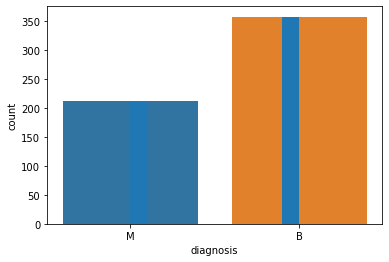

In [10]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
plt.hist(y,label="Count")
#plt.xlabel("Diagnosis", fontsize=14)
#plt.ylabel("Count", fontsize=14)
plt.show()

In [11]:
######Feature Info: Find variance, standart deviation, number of sample (count) or max min values########
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


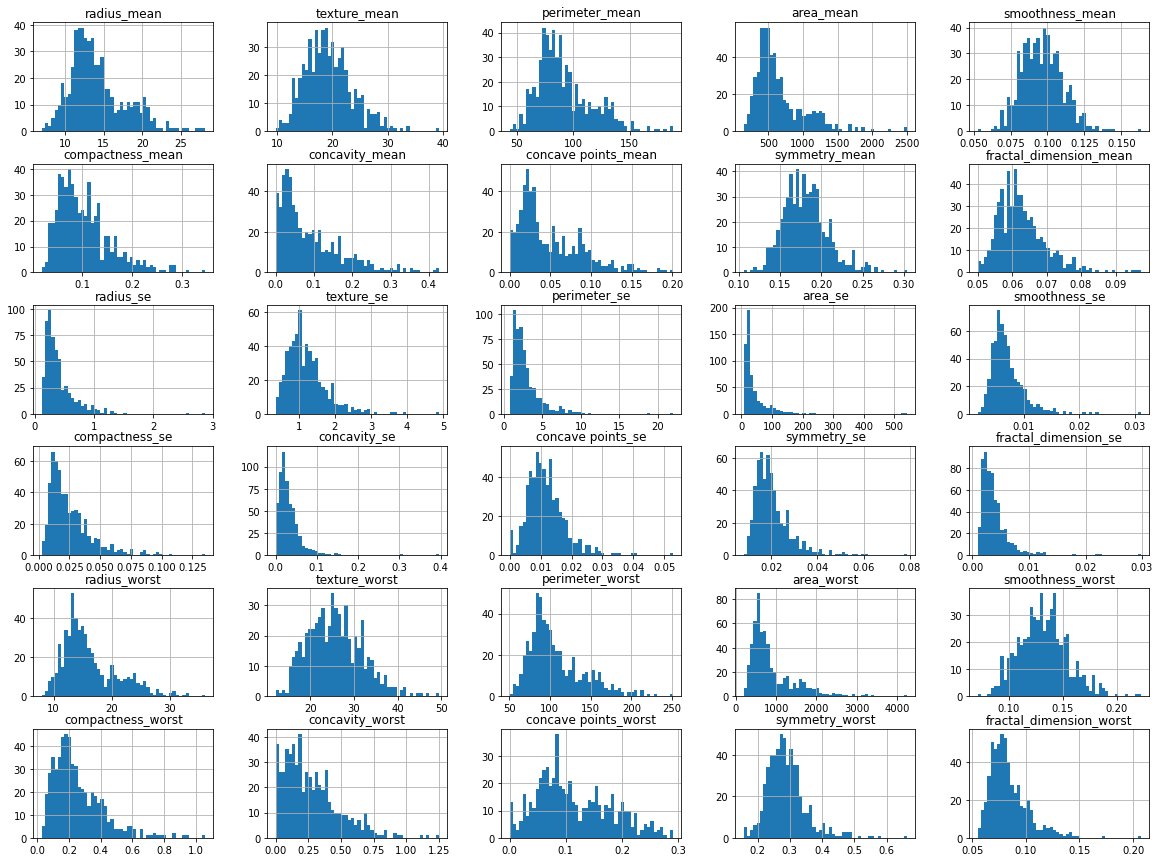

In [12]:
###########Do we need Standardization / Normalization? ########
##Yes as Max values range between 0.16(smoothness_mean) to 2501(area_mean)
X.hist(bins=50, figsize=(20,15))
plt.show()


In [13]:
########################View Co-relation########################
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [14]:
############################################### Feature Selection ################################################### 
#As it can be seen above radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. 
#Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean.
# Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. 
#radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. 
#Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. 
#Compactness_se, concavity_se and concave points_se so I use concavity_se. 
#texture_mean and texture_worst are correlated and I use texture_mean. 
#area_worst and area_mean are correlated, I use area_mean.

array([[<AxesSubplot:xlabel='area_mean', ylabel='area_mean'>,
        <AxesSubplot:xlabel='concavity_mean', ylabel='area_mean'>,
        <AxesSubplot:xlabel='area_se', ylabel='area_mean'>,
        <AxesSubplot:xlabel='area_worst', ylabel='area_mean'>,
        <AxesSubplot:xlabel='concavity_worst', ylabel='area_mean'>,
        <AxesSubplot:xlabel='concavity_se', ylabel='area_mean'>,
        <AxesSubplot:xlabel='texture_mean', ylabel='area_mean'>],
       [<AxesSubplot:xlabel='area_mean', ylabel='concavity_mean'>,
        <AxesSubplot:xlabel='concavity_mean', ylabel='concavity_mean'>,
        <AxesSubplot:xlabel='area_se', ylabel='concavity_mean'>,
        <AxesSubplot:xlabel='area_worst', ylabel='concavity_mean'>,
        <AxesSubplot:xlabel='concavity_worst', ylabel='concavity_mean'>,
        <AxesSubplot:xlabel='concavity_se', ylabel='concavity_mean'>,
        <AxesSubplot:xlabel='texture_mean', ylabel='concavity_mean'>],
       [<AxesSubplot:xlabel='area_mean', ylabel='area_se'>,
   

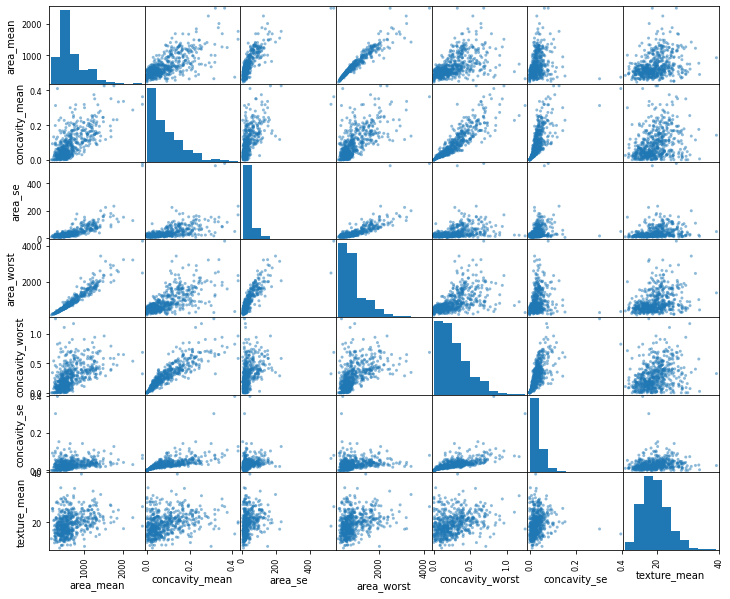

In [15]:
#####################################Visualize correlation with the scatter_matrix()##################################
pd.plotting.scatter_matrix(X[['area_mean','concavity_mean','area_se','area_worst','concavity_worst','concavity_se','texture_mean']],figsize = (12,10))

In [16]:
#Test / Train Split
print("Before Test/Train Split:", X.shape, y.shape)

Before Test/Train Split: (569, 30) (569,)


In [17]:
################ train | test (Split data in 80/20 ratio for traing and testing) #################
#from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [18]:
print("After Test / Train Split:", Xtrain.shape, Xtest.shape,ytrain.size, ytest.size)

After Test / Train Split: (455, 30) (114, 30) 455 114


In [19]:
######################### Prepare Data for ML Algorithms: scaling data ######################
# Since this is classification problem will be using Standardization (how many standard deviation value is away from mean) 

#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(Xtrain)
scaled_Xtest = scaler.transform(Xtest)
X_mean = scaler.mean_
X_std = scaler.scale_

In [20]:
#scaled_X_train,scaled_X_test
X_mean,X_std


(array([1.41176352e+01, 1.91850330e+01, 9.18822418e+01, 6.54377582e+02,
        9.57440220e-02, 1.03619319e-01, 8.88981451e-02, 4.82798703e-02,
        1.81098681e-01, 6.27567692e-02, 4.02015824e-01, 1.20268681e+00,
        2.85825341e+00, 4.00712989e+01, 6.98907473e-03, 2.56354484e-02,
        3.28236723e-02, 1.18939407e-02, 2.05735121e-02, 3.82045560e-03,
        1.62351033e+01, 2.55356923e+01, 1.07103121e+02, 8.76987033e+02,
        1.31532132e-01, 2.52741802e-01, 2.74594569e-01, 1.14182222e-01,
        2.90502198e-01, 8.38678462e-02]),
 array([3.53192761e+00, 4.26131404e+00, 2.42952845e+01, 3.54552925e+02,
        1.39076981e-02, 5.24128055e-02, 7.93805091e-02, 3.80183541e-02,
        2.74570850e-02, 7.20178506e-03, 2.82849558e-01, 5.41151676e-01,
        2.06893139e+00, 4.71843820e+01, 3.05347371e-03, 1.85862970e-02,
        3.21102454e-02, 6.28718721e-03, 8.16296642e-03, 2.78406874e-03,
        4.80597715e+00, 6.05843964e+00, 3.33379686e+01, 5.67048681e+02,
        2.30571257e-02

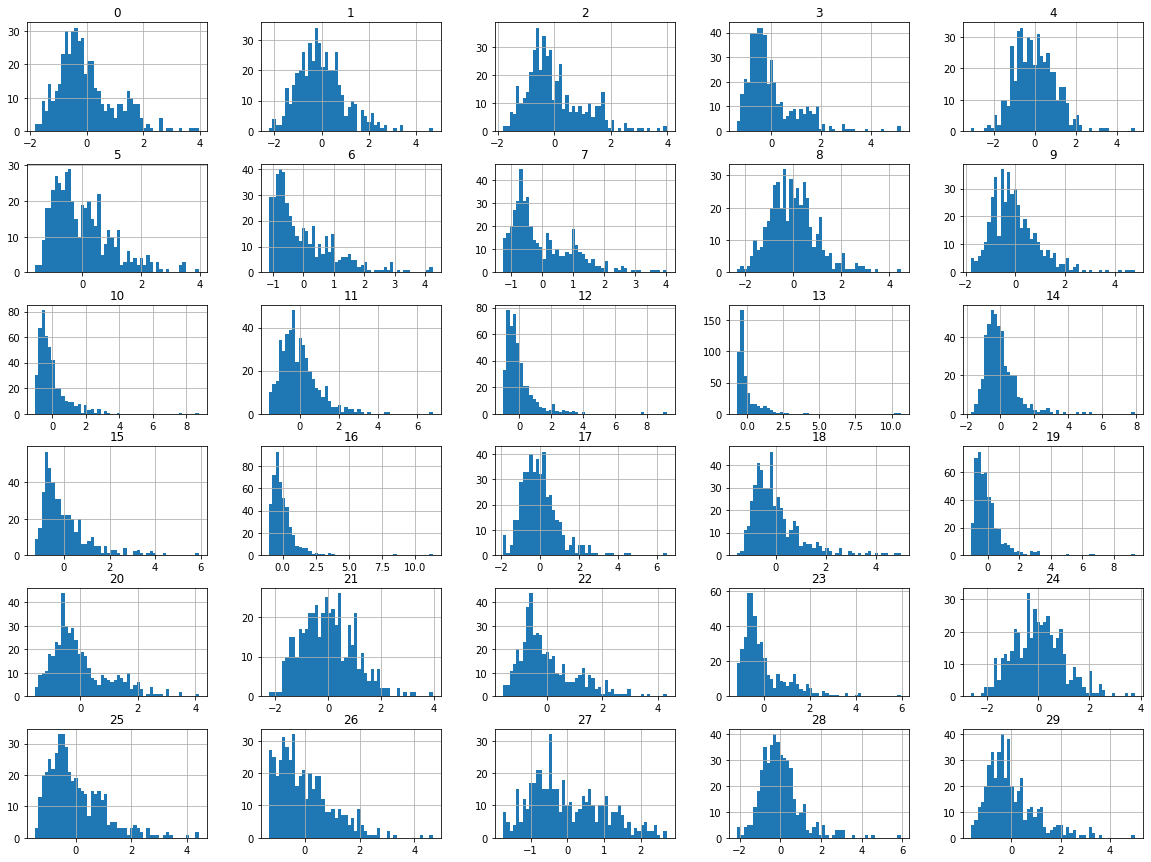

In [21]:
########## View Scaled Data #############

data=pd.DataFrame(scaled_Xtrain)
#data.describe()
data.hist(bins=50, figsize=(20,15))
plt.show()



# Exploring Models
####################################################################################################################
## Performance Measures:
####################################################################################################################

 Since this is a classification problem - will be using accuracy, f1 score, precision and recall along with confusion matrix
####################################################################################################################

# 1. Random Forest Classifier

In [22]:
# creating the parameter grid
n_estimators = [100, 200, 300]
max_features = [5 ,10, 15, 20]
bootstrap = [True, False]
oob_score = [True, False]
criterion = ['gini', 'entropy', 'log_loss']

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score,
             'criterion':criterion}

In [23]:
# creating instances
rdfc = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rdfc, param_grid)

In [24]:
# fit on model
grid.fit(scaled_Xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [5, 10, 15, 20],
                         'n_estimators': [100, 200, 300],
                         'oob_score': [True, False]})

In [25]:
# the best parameters
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 5,
 'n_estimators': 100,
 'oob_score': True}

In [26]:
# y predictions
ypred = grid.predict(scaled_Xtest)

In [27]:
ypred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)

In [28]:
# classification report ----> accuracy, f1 score, precision and recall
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



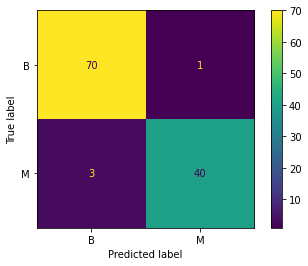

In [29]:
# plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(grid,scaled_Xtest,ytest)


In [30]:
#######################Finish Random Forest Classifier########################

# 2. Stochastic Gradient Descent (SGD) Classification 

In [31]:
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc)
sgdc.fit(scaled_Xtrain, ytrain)
score = sgdc.score(scaled_Xtrain, ytrain)
print("Training Score: ", score)


SGDClassifier(tol=0.01)
Training Score:  0.9626373626373627


In [32]:
ypred2 = sgdc.predict(scaled_Xtest)

# classification report ----> accuracy, f1 score, precision and recall
cr = classification_report(ytest, ypred2)
print(cr) 

              precision    recall  f1-score   support

           B       0.97      0.94      0.96        71
           M       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



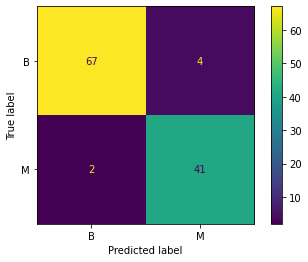

In [33]:
# plotting confusion matrix
cm = ConfusionMatrixDisplay.from_estimator(sgdc,scaled_Xtest,ytest)
print(cm)

In [34]:
#######################Finish SGD Classifier########################

# 4. KNN Classifier

In [35]:
#from sklearn.neighbors import KNeighborsClassifier

In [36]:
k_values = list(range(1,20))

In [37]:
knn = KNeighborsClassifier()

In [38]:
operations = [('scaler',scaler),('knn',knn)]

In [39]:
param_grid2 = {'knn__n_neighbors': k_values}

In [40]:
# creating pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [41]:
full_cv_classifier = GridSearchCV(pipe,param_grid2,cv=5,scoring='accuracy')

In [42]:
full_cv_classifier.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [43]:
full_cv_classifier.best_estimator_.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])>

In [44]:
#Final Model
knnc7 = KNeighborsClassifier(n_neighbors=7)
operations2 = [('scaler',scaler),('knn7',knnc7)]
pipe2 = Pipeline(operations2)

In [45]:
pipe2.fit(Xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn7', KNeighborsClassifier(n_neighbors=7))])

In [46]:
pipe_pred = pipe2.predict(Xtest)

In [47]:
print(classification_report(ytest,pipe_pred))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



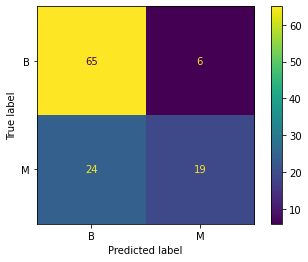

In [48]:
ConfusionMatrixDisplay.from_estimator(pipe2,scaled_Xtest,ytest)

In [49]:
#######################Finish Random Forest########################

# 4. Linear SVC

In [50]:
# hyperparameter tuning
#from sklearn.svm import SVC

In [51]:
param_grid3 = {'C':[0.001, 0.01, 0.1, 1, 10],
              'kernel':['linear','rbf']}
svm = SVC()
grid2 = GridSearchCV(svm, param_grid3)

In [52]:
grid2.fit(scaled_Xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

In [53]:
grid2.best_estimator_.get_params

<bound method BaseEstimator.get_params of SVC(C=1)>

In [54]:
grid2.best_score_

0.9758241758241759

In [55]:
ypred3 = grid2.predict(scaled_Xtest)

In [56]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



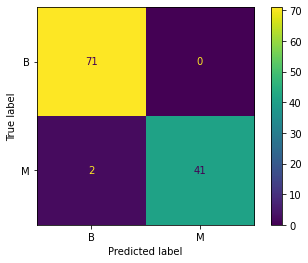

In [57]:
ConfusionMatrixDisplay.from_estimator(grid2,scaled_Xtest,ytest)

## **Based on performance measures Linear SVC model seems to be performing better than all others!!**

## Refrences:

##############################################################################################################################
1. UCI Machine Learning Repository 
2. CloudXLab
3. Scikit learn API
4. kaggle.com
5. Cancer.org
##############################################################################################################################
